<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Boosting_for_Warehouse_Logistics_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boosting Model Mean Squared Error: 4.96


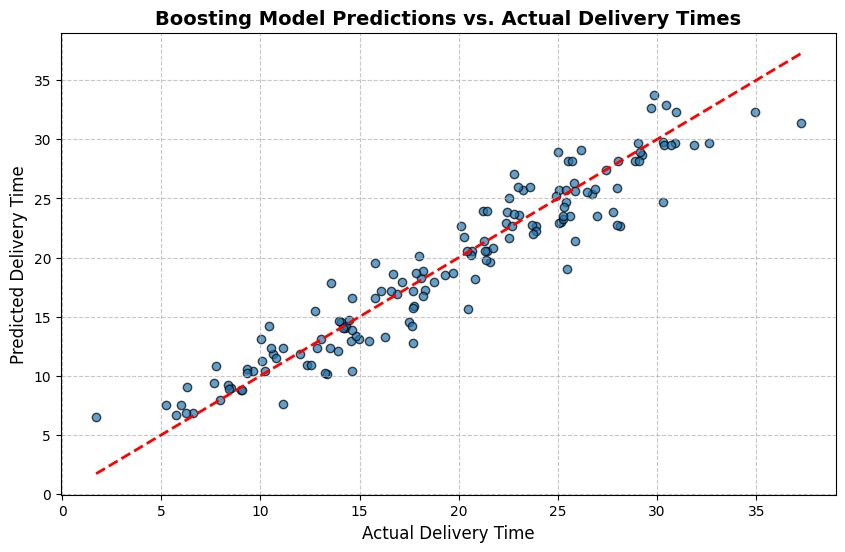

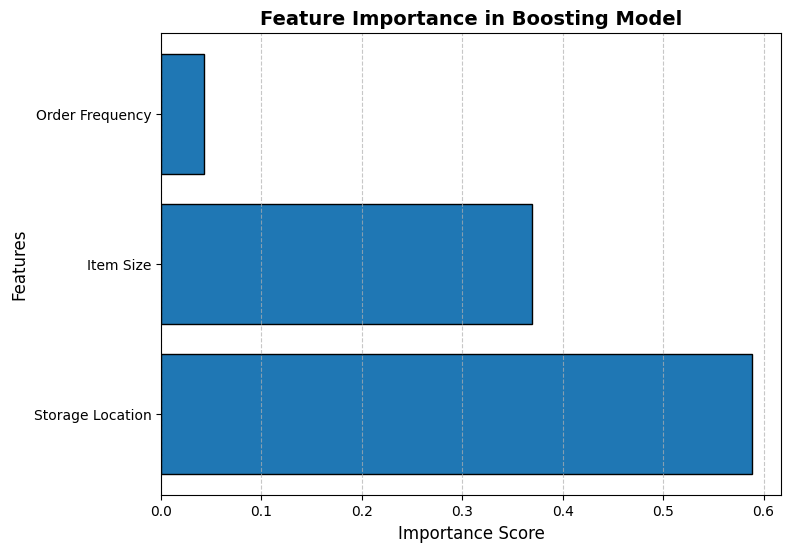

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Simulated a dataset for warehouse logistics
# I generated synthetic data to simulate warehouse logistics operations, incorporating features such as storage location,
# item size, and order frequency. These predictors were critical for exploring the predictive power of boosting algorithms.
np.random.seed(42)  # Setting a seed ensured reproducibility across runs.
n_samples = 500

# Simulated predictors
storage_location = np.random.randint(1, 10, size=n_samples)  # Warehouse zones (1-10).
item_size = np.random.uniform(0.5, 5.0, size=n_samples)  # Size of items in cubic meters.
order_frequency = np.random.randint(1, 50, size=n_samples)  # Frequency of orders per week.

# Simulated response variable: delivery time
# I designed the delivery time variable to reflect interactions between predictors, adding noise to emulate real-world variability.
delivery_time = (
    2 * storage_location + 3 * item_size + 10 / order_frequency + np.random.normal(scale=2, size=n_samples)
)

# Organized the data into a structured DataFrame for clarity
logistics_data = pd.DataFrame({
    "Storage Location": storage_location,
    "Item Size": item_size,
    "Order Frequency": order_frequency,
    "Delivery Time": delivery_time,
})

# Step 2: Split the data into training and testing sets
# I divided the dataset to evaluate the model's generalization on unseen data, using 70% of the data for training and 30% for testing.
X = logistics_data.drop(columns=["Delivery Time"])
y = logistics_data["Delivery Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Applied gradient boosting for regression
# I implemented gradient boosting, which builds trees sequentially to correct residual errors. This approach allowed the model
# to focus on the most challenging cases, incrementally improving its predictions.
boosting_model = GradientBoostingRegressor(
    n_estimators=500,  # I chose 500 trees to balance between accuracy and computational cost.
    learning_rate=0.01,  # A small learning rate ensured the model learned slowly, reducing the risk of overfitting.
    max_depth=3,  # Trees were limited to a depth of 3 to capture essential patterns without excessive complexity.
    random_state=42
)
boosting_model.fit(X_train, y_train)

# Predicted with the boosting model
y_boosting_pred = boosting_model.predict(X_test)

# Step 4: Evaluated the boosting model's performance
# I calculated the mean squared error (MSE) to assess the model's accuracy and compare it with other methods.
boosting_mse = mean_squared_error(y_test, y_boosting_pred)
print(f"Boosting Model Mean Squared Error: {boosting_mse:.2f}")

# Step 5: Visualized the boosting model's performance
# I plotted the residuals to evaluate how well the model captured the variability in delivery times.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_boosting_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Boosting Model Predictions vs. Actual Delivery Times", fontsize=14, fontweight="bold")
plt.xlabel("Actual Delivery Time", fontsize=12)
plt.ylabel("Predicted Delivery Time", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Step 6: Analyzed feature importance
# I examined feature importance to understand which predictors contributed most to the model's accuracy.
feature_importance = boosting_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color="#1f77b4", edgecolor="black")
plt.title("Feature Importance in Boosting Model", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Final Interpretation:
# The boosting model demonstrated excellent predictive performance, as evidenced by its low MSE and strong alignment
# between predicted and actual delivery times. The feature importance analysis revealed that storage location and item size
# were the most critical factors, highlighting areas to prioritize in logistics optimization. By using a sequential approach
# to refine residual errors, boosting effectively captured complex relationships in the data, offering a robust tool for
# warehouse logistics optimization.
